In [1]:
# First of all we import the most important class: LogNegManager. We will communicate with the suite only with this class
# The rest of imports are made to ensure that typewriting is correct, but can be omitted

from src.LogNegManager import LogNegManager
from src.TypesAndParameters import TypeOfMeasurement, InitialStateParameters, TransformationMatrixParameters, MeasurementParameters, GeneralOptionsParameters

In [3]:
# The generalOptions dictionary allow for defining the number of modes that we will have and the directories to use. Also it allow for activating the parallelize option
generalOptions =  {
    GeneralOptionsParameters.NUM_MODES.value: 128,
    GeneralOptionsParameters.PLOTS_DIRECTORY.value: "./plots/128-plots/",
    GeneralOptionsParameters.DATA_DIRECTORY.value: "./data/128-data/",
    GeneralOptionsParameters.BASE_DIRECTORY.value: "./",
    GeneralOptionsParameters.PARALLELIZE.value: True
  }

# If we will obtain the transformation matrix from normalized data (the one from DyNCHE-toolbox) we have to tell the directory to look at as well as the time instant to get.
# If another kind of Bogoliubov matrix wants to be used, leave this dictionary as {} and introduce the np.ndarray corresponding to the matrix when calling LogNegManager
transformationMatrixOptions = {
    TransformationMatrixParameters.DATA_DIRECTORY.value: "./sims-128/",
    TransformationMatrixParameters.INSTANT_TO_PLOT.value: -1
  }

# Here we define a list of the different initial states on which we want to perform the Bogoliubov transformation
# Each state has a temperature if we want to do it thermal, if not is sufficient to enter 0.0 or not introducing the key for temperature
# Squeezing is also allowed for one mode and two mode squeezing, but both cannot be different from zero at the same time
initialStates = [
      {InitialStateParameters.TEMPERATURE.value:  0.0,
      InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
        InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},

      {InitialStateParameters.TEMPERATURE.value:  5.0,
      InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
        InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0},

      {InitialStateParameters.TEMPERATURE.value:  10.0,
      InitialStateParameters.ONE_MODE_SQUEEZING.value: 0.0,
        InitialStateParameters.TWO_MODE_SQUEEZING.value: 0.0}

    ]

# Define the kind of entanglement measure that will be perform for each state specified above
# Each measurement in the list will be a different data file and different figure
# Define the type of measurement and the type of state to apply on (0 for states before the main transformation, 1 for outstates after the transformation)
# For most of the measurements one can choose to focus on just few modes by introducing modesToApply as a list of modes (from 1 to numModes)
measurements = [
    {MeasurementParameters.TYPE.value: TypeOfMeasurement.FullLogNeg.value,
    MeasurementParameters.TYPE_OF_STATE.value:  1},
    {MeasurementParameters.TYPE.value: TypeOfMeasurement.HighestOneByOne.value,
     MeasurementParameters.MODES_TO_APPLY.value: [2,3,4],
    MeasurementParameters.TYPE_OF_STATE.value:  1}
  ]

In [4]:
# Instantiate the Manager to make everything works
LNManager = LogNegManager(generalOptions=generalOptions, transformationDict=transformationMatrixOptions,
                          initialStates=initialStates)

In [4]:
# For each kind of measurement in the list, a dict will be create (and saved as an .npz file)
# This dict is used as an input later for plotting
collection_of_dict_to_plot = []
for measurement in measurements:
        collection_of_dict_to_plot.append(LNManager.measureEntanglement(measurement))

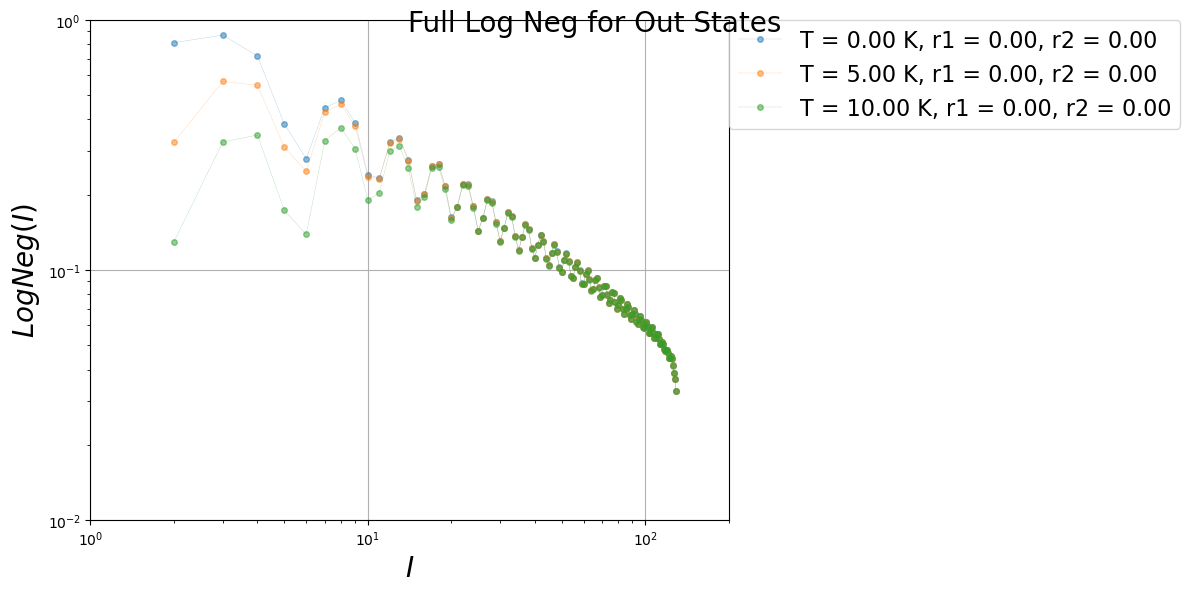

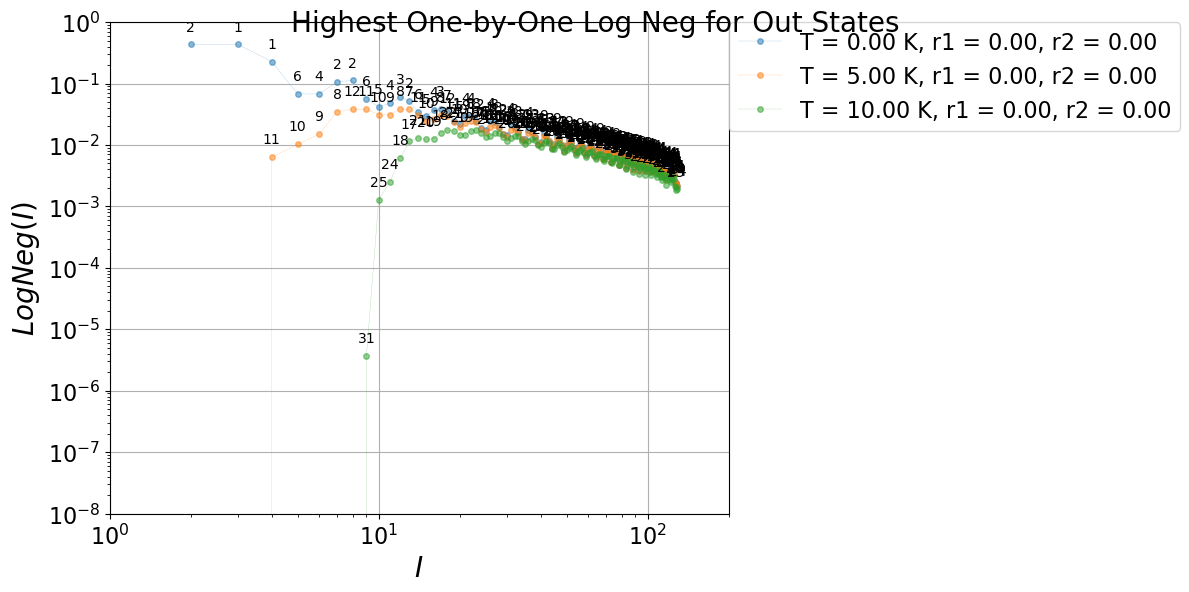

In [5]:
# Generate a plot for every measurement computed
for dict_to_plot in collection_of_dict_to_plot:
    LNManager.plotResults(dict_to_plot)